# Library Project

## Import the Data from the [Seattle Open Data API](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6)


In [160]:
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt 
import scipy.stats as stats

%matplotlib inline


In [6]:

client = Socrata('data.seattle.gov',
                  app_token='h5vKraDOpWIZy3vvPhZ6hBQab')

results = client.get('tmmm-ytt6', select="usageclass, checkoutyear, checkoutmonth, checkouts, checkouttype", where='checkoutyear>=2018 AND usageclass="Digital"', limit = 10000000)

In [7]:
len(results)

2151128

## Moving Library API Results into Pandas DataFrame

In [8]:
library_df = pd.DataFrame.from_records(results)

In [9]:
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151128 entries, 0 to 2151127
Data columns (total 5 columns):
checkoutmonth    object
checkouts        object
checkouttype     object
checkoutyear     object
usageclass       object
dtypes: object(5)
memory usage: 82.1+ MB


In [49]:
library_df = library_df.astype({'checkouts': 'int64','checkoutmonth': 'int64','checkoutyear': 'int64' }, inplace=True)

In [50]:
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151128 entries, 0 to 2151127
Data columns (total 5 columns):
checkoutmonth    int64
checkouts        int64
checkouttype     object
checkoutyear     int64
usageclass       object
dtypes: int64(3), object(2)
memory usage: 82.1+ MB


## Grouping by Month and Year:  
 

In [30]:
March_2020 = library_df[(library_df['checkoutyear']==2020) & (library_df['checkoutmonth']==3)]

In [51]:
March_2020.groupby(['checkoutyear', 'checkoutmonth']).sum()

,,checkouts
checkoutyear,checkoutmonth,
2020,3,321320


In [52]:
checkouts_per_month = library_df.groupby(['checkoutyear', 'checkoutmonth']).sum()

In [54]:
checkouts_per_month = checkouts_per_month.sort_values(by=['checkoutyear', 'checkoutmonth'])

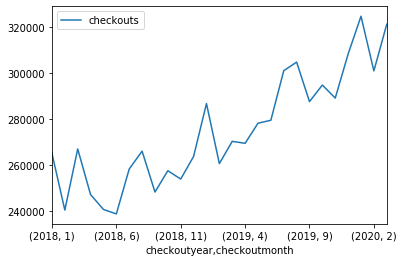

In [59]:
checkouts_per_month.plot()

In [62]:
sum_list = list(checkouts_per_month['checkouts'])

In [63]:
rate_list = []
for i in range(len(sum_list)-1):
    rate = sum_list[i+1]/sum_list[i]
    rate_list.append(rate)

In [64]:
rate_list.insert(0,np.nan)

In [65]:
checkouts_per_month['Rate of Increase'] = rate_list

In [66]:
checkouts_per_month

checkouts  Rate of Increase
checkoutyear checkoutmonth                             
2018         1                 265077               NaN
             2                 240372          0.906801
             3                 266994          1.110753
             4                 247109          0.925523
             5                 240636          0.973805
             6                 238697          0.991942
             7                 258246          1.081899
             8                 266043          1.030192
             9                 248227          0.933033
             10                257505          1.037377
             11                253878          0.985915
             12                263737          1.038834
2019         1                 286775          1.087352
             2                 260620          0.908796
             3                 270307          1.037169
             4                 269466          0.996889
             5                 278206          1.032435
             6                 279500          1.004651
             7                 301073          1.077184
             8                 304842          1.012519
             9                 287627          0.943528
             10                294843          1.025088
             11                289152          0.980698
             12                308348          1.066387
2020         1                 324816          1.053407
             2                 301015          0.926725
             3                 321320          1.067455

In [67]:
checkouts_per_month_type = library_df.groupby(['checkouttype','checkoutyear', 'checkoutmonth']).sum()

In [70]:
checkouts_per_month_type = checkouts_per_month_type.reset_index()

In [72]:
OD_checkouts = checkouts_per_month_type[checkouts_per_month_type['checkouttype']=='OverDrive']

In [73]:
OD_sum_list = list(OD_checkouts['checkouts'])

OD_rate_list = []
for i in range(len(sum_list)-1):
    rate = OD_sum_list[i+1]/sum_list[i] -1
    OD_rate_list.append(rate)

In [74]:
OD_rate_list.insert(0,0)

In [76]:
OD_checkouts.reset_index()

,index,checkouttype,checkoutyear,checkoutmonth,checkouts
0,9,OverDrive,2018,1,225617
1,10,OverDrive,2018,2,204147
2,11,OverDrive,2018,3,227654
3,12,OverDrive,2018,4,224139
4,13,OverDrive,2018,5,227546
5,14,OverDrive,2018,6,234192
6,15,OverDrive,2018,7,253912
7,16,OverDrive,2018,8,260826
8,17,OverDrive,2018,9,243473
9,18,OverDrive,2018,10,250276


In [78]:
OD_checkouts.set_index(np.arange(0,27,1))

,checkouttype,checkoutyear,checkoutmonth,checkouts
0,OverDrive,2018,1,225617
1,OverDrive,2018,2,204147
2,OverDrive,2018,3,227654
3,OverDrive,2018,4,224139
4,OverDrive,2018,5,227546
5,OverDrive,2018,6,234192
6,OverDrive,2018,7,253912
7,OverDrive,2018,8,260826
8,OverDrive,2018,9,243473
9,OverDrive,2018,10,250276


In [79]:
OD_checkouts['Rate of Increase'] = OD_rate_list

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


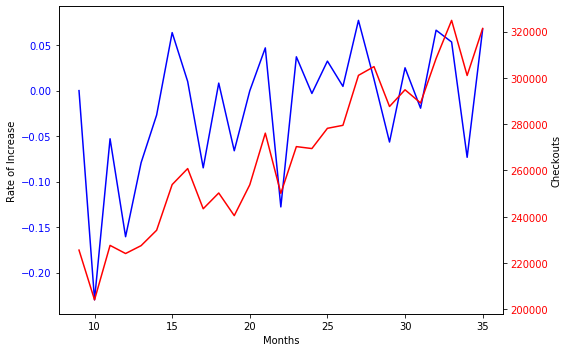

In [84]:
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'blue'
ax1.set_xlabel('Months')
ax1.set_ylabel('Rate of Increase')  # we already handled the x-label with ax1
ax1.plot(OD_checkouts.index, OD_checkouts['Rate of Increase'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'red'

ax2.set_ylabel('Checkouts')
ax2.plot(OD_checkouts.index, OD_checkouts['checkouts'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [89]:
OD_checkouts.iloc[0:25, 4].mean()

-0.018767377653160548

In [87]:
OD_checkouts.iloc[0:25, 4].std()

0.07396906419295081

In [90]:
OD_checkouts.iloc[26, 4]

0.06745511021045458

## New Pull to get 2016, 2017 Data

In [93]:

client = Socrata('data.seattle.gov',
                  app_token='h5vKraDOpWIZy3vvPhZ6hBQab')

results2 = client.get('tmmm-ytt6', select="usageclass, checkoutyear, checkoutmonth, checkouts, checkouttype", where='checkoutyear BETWEEN 2016 AND 2018 AND usageclass="Digital"', limit = 10000000)

In [94]:
library_df2 = pd.DataFrame.from_records(results2)

In [95]:
library_df2 = library_df2.astype({'checkouts': 'int64','checkoutmonth': 'int64','checkoutyear': 'int64'}, inplace=True)

In [98]:
library_combined = pd.concat([library_df, library_df2])

In [107]:
#library_combined.set_index(np.arange(0,len(library_combined),1))

In [106]:
library_combined.to_csv('~/galvanize/capstone/capstone_one/library_combined.csv')

In [102]:
library_combined['checkoutyear'].unique()

array([2018, 2019, 2020, 2016, 2017])

In [151]:

#Group by year and month and sum checkouts, then sort into chronlogical order    
ckouts_per_month_type = library_combined.groupby(['checkouttype','checkoutyear', 'checkoutmonth']).sum()
ckouts_per_month_type = ckouts_per_month_type.sort_values(by=['checkouttype','checkoutyear', 'checkoutmonth'])
ckouts_per_month_type.reset_index(inplace=True)



#Isolate checkout type to Overdrive and set index 
OD_ckouts = ckouts_per_month_type[ckouts_per_month_type['checkouttype']=='OverDrive']
OD_ckouts.set_index(np.arange(0,len(OD_ckouts),1), inplace=True)

#Create a new colum with the increase in online checkouts month over month 
OD_sum_list = list(OD_ckouts['checkouts'])
OD_rates = []


for i in range(len(sum_list)-1):
    rate = OD_sum_list[i+1]/sum_list[i] -1
    OD_rates.append(rate)
    
OD_rates.insert(0,0)

OD_ckouts['Rate of Increase'] = OD_rates



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [152]:
OD_ckouts


,checkouttype,checkoutyear,checkoutmonth,checkouts,Rate of Increase
0,OverDrive,2016,1,165312,0.000000
1,OverDrive,2016,2,154088,-0.067896
2,OverDrive,2016,3,165164,0.071881
3,OverDrive,2016,4,161423,-0.022650
4,OverDrive,2016,5,168296,0.042578
5,OverDrive,2016,6,167416,-0.005229
6,OverDrive,2016,7,176392,0.053615
7,OverDrive,2016,8,179073,0.015199
8,OverDrive,2016,9,169489,-0.053520
9,OverDrive,2016,10,169215,-0.001617


In [170]:
OD_mean = OD_ckouts.iloc[0:49,4].mean()

In [169]:
OD_std = OD_ckouts.iloc[0:49,4].std()

In [163]:
OD_March_2020 = OD_ckouts.iloc[50,4]

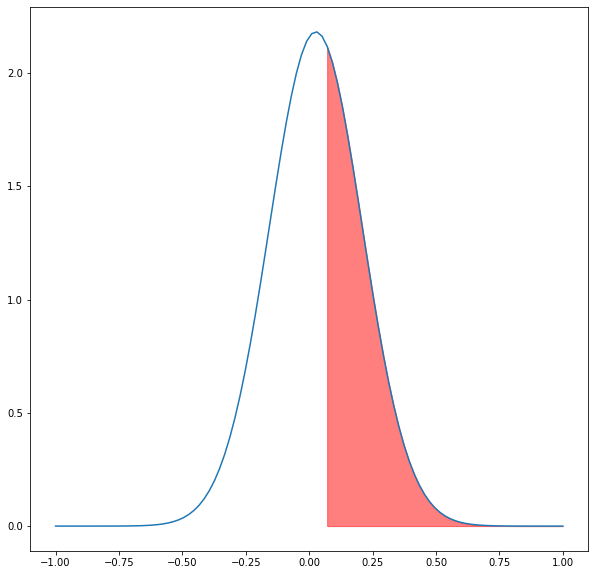

In [182]:
fig, ax = plt.subplots(figsize=(10,10))

OD_binom = stats.norm(OD_mean, OD_std)
x = np.linspace(-1,1,100)

ax.plot(x, OD_binom.pdf(x))
ax.fill_between(x, OD_binom.pdf(x), 
                where=(x >= OD_March_2020), color="red", alpha=0.5)
